## Regression (Linear Regression)
____
By : Omar Ahmed Sabri


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectPercentile,f_classif
from sklearn.preprocessing import PolynomialFeatures
import pickle
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
df=pd.read_csv('/content/house_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,N,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,N,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,N,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,N,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,N,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
df.shape

(21613, 21)

# Data Information, Preprocessing, Viusalization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


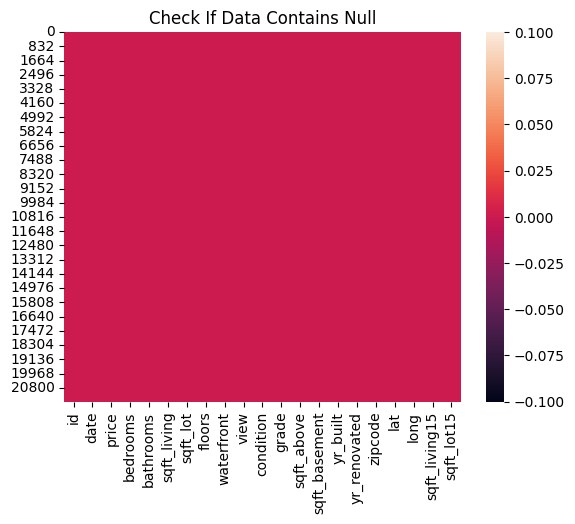

In [8]:
sns.heatmap(df.isnull())
plt.title("Check If Data Contains Null")
plt.show()

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
categorical=['waterfront','condition']

In [11]:
for i in categorical:
  print(f'The unique values for "{i}" is : {df[i].unique()}')

The unique values for "waterfront" is : ['N' 'Y']
The unique values for "condition" is : ['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [12]:
for i in categorical:
  print(f'The value count for "{i}" is : {df[i].value_counts()}')

The value count for "waterfront" is : waterfront
N    21450
Y      163
Name: count, dtype: int64
The value count for "condition" is : condition
Average      14031
Good          5679
Very Good     1701
Fair           172
Poor            30
Name: count, dtype: int64


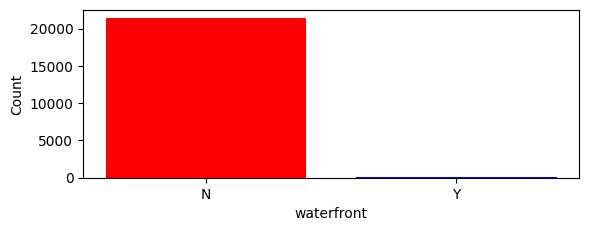

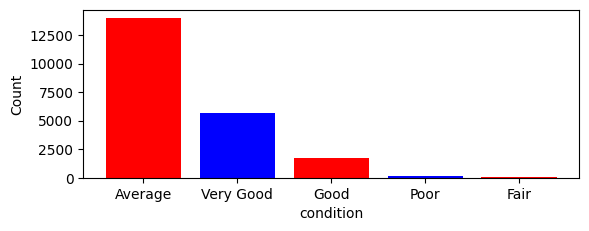

In [13]:
for i in range(len(categorical)):
  plt.subplot(2,1,i+1)
  plt.bar(df[categorical[i]].unique(),df[categorical[i]].value_counts(),color=['red','blue'])
  plt.xlabel(categorical[i])
  plt.ylabel('Count')
  plt.show()

In [14]:
numeric=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

Detect Outliers


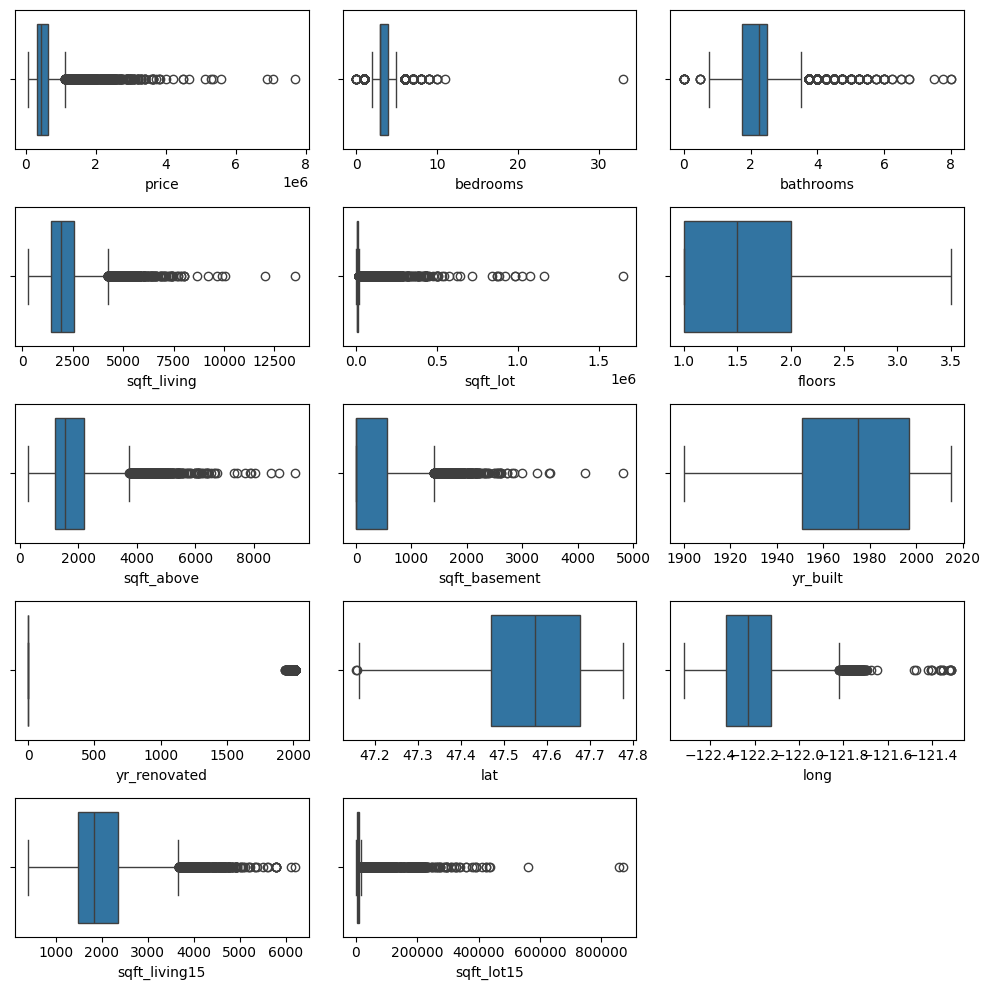

In [15]:
fig = plt.figure(figsize=(10,10))
for i in range(len(numeric)):
  plt.subplot(5,3,i+1)
  sns.boxplot(x=df[numeric[i]])
  plt.tight_layout()

In [16]:
for i in range(len(numeric)):
    Q3 = df[numeric[i]].quantile(.75)
    Q1= df[numeric[i]].quantile(.25)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df.drop(df[df[numeric[i]] > upper_limit].index, inplace=True)
    df.drop(df[df[numeric[i]] < lower_limit].index, inplace=True)

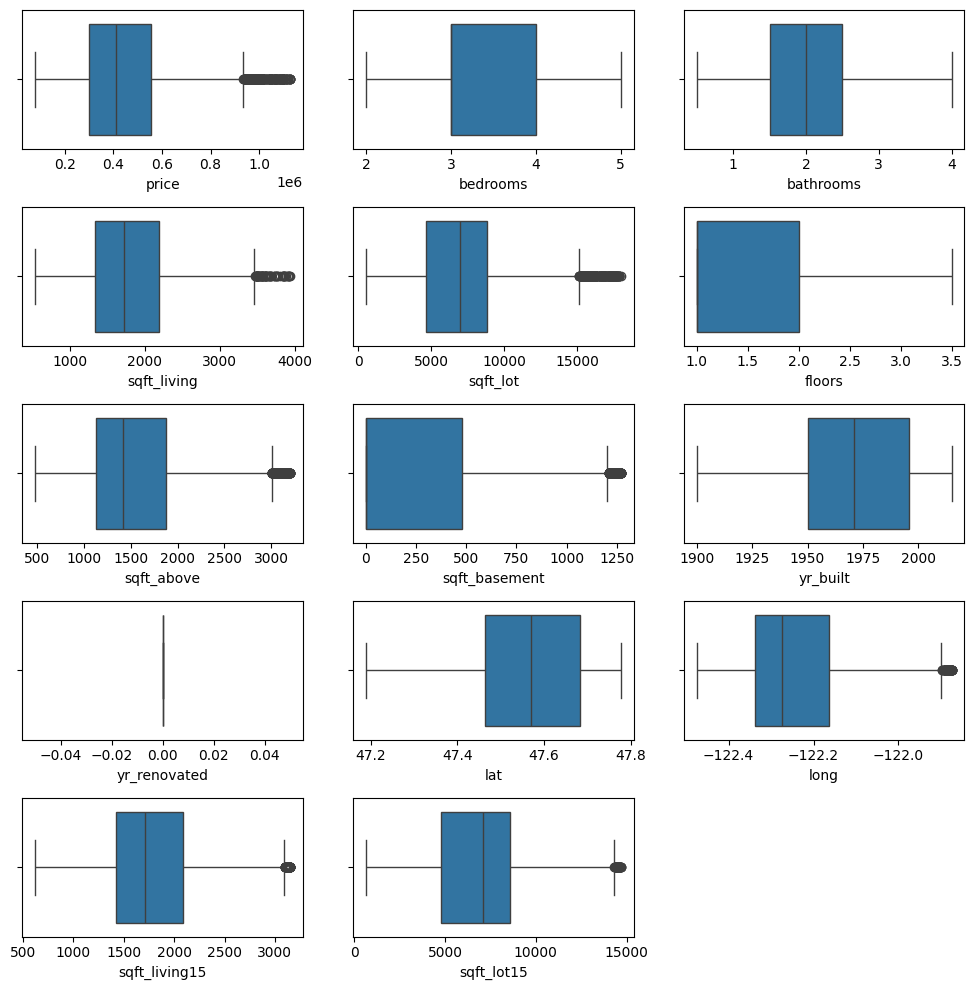

In [17]:
fig = plt.figure(figsize=(10,10))
for i in range(len(numeric)):
  plt.subplot(5,3,i+1)
  sns.boxplot(x=df[numeric[i]])
  plt.tight_layout()

Distribution of Feature


In [18]:
def PlotPie(feature):
  plt.pie(df[feature].value_counts(),labels=df[feature].unique(),autopct ='%1.2f%%' , labeldistance = 1.2,
          explode = [0.05 for i in range(len(df[feature].value_counts()))])

  plt.title(f'Distribution of {feature}')
  plt.show()

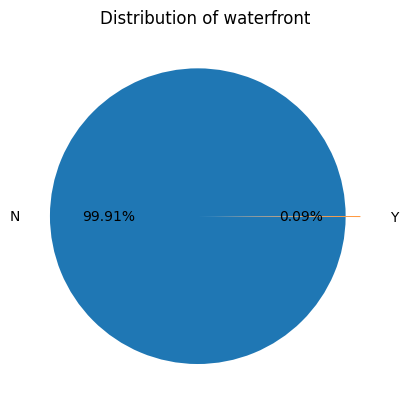

In [19]:
PlotPie('waterfront')

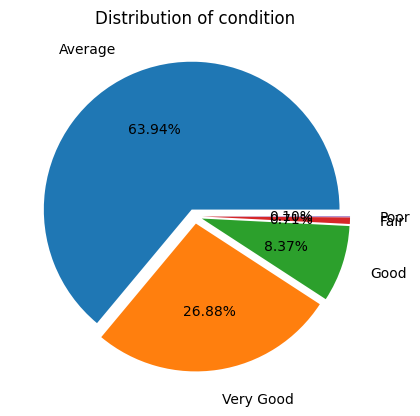

In [20]:
PlotPie('condition')

Encoding Categorical Values

In [21]:
labelEncoder=LabelEncoder()
df['condition']=labelEncoder.fit_transform(df['condition'])

In [22]:
df['waterfront']=df['waterfront'].replace({'N':0,'Y':1})

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


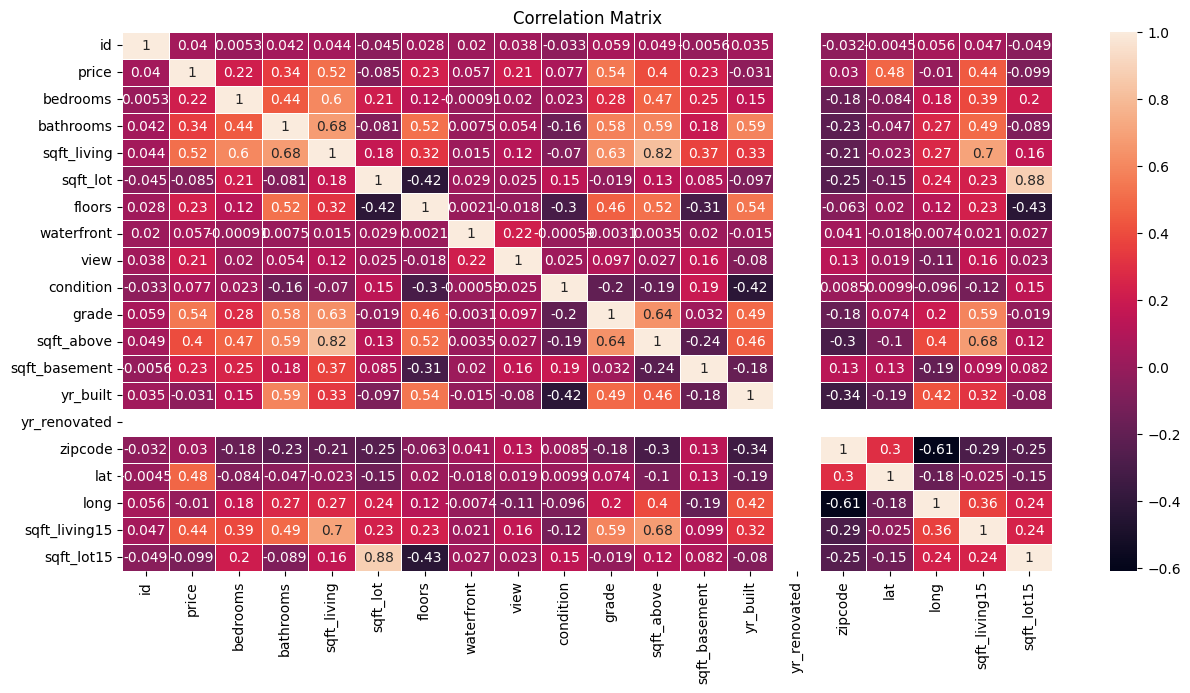

In [24]:
plt.figure(figsize=(15,7))
plt.title('Correlation Matrix')
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,linewidth=.5)
plt.show()

In [25]:
columns_toDrop=['id','date','yr_renovated']

In [26]:
df.drop(columns_toDrop,axis=1,inplace=True)

In [27]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,0,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,0,7,1715,0,1995,98003,47.3097,-122.327,2238,6819


In [28]:
df.shape

(15422, 18)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15422 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15422 non-null  float64
 1   bedrooms       15422 non-null  int64  
 2   bathrooms      15422 non-null  float64
 3   sqft_living    15422 non-null  int64  
 4   sqft_lot       15422 non-null  int64  
 5   floors         15422 non-null  float64
 6   waterfront     15422 non-null  int64  
 7   view           15422 non-null  int64  
 8   condition      15422 non-null  int64  
 9   grade          15422 non-null  int64  
 10  sqft_above     15422 non-null  int64  
 11  sqft_basement  15422 non-null  int64  
 12  yr_built       15422 non-null  int64  
 13  zipcode        15422 non-null  int64  
 14  lat            15422 non-null  float64
 15  long           15422 non-null  float64
 16  sqft_living15  15422 non-null  int64  
 17  sqft_lot15     15422 non-null  int64  
dtypes: float64(

# Spilt Data

In [30]:
X=df.drop('price',axis=1)
y=df['price']

# Feature Selection

In [31]:
print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = f_classif , percentile=70)
X_Selected = FeatureSelection.fit_transform(X, y)
X = pd.DataFrame(X_Selected,columns = [i for i,j in zip(X.columns,FeatureSelection.get_support()) if j])
X

Original X Shape is  (15422, 17)


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,lat,sqft_living15
0,3.0,1.00,1180.0,1.0,0.0,0.0,7.0,1180.0,0.0,1955.0,47.5112,1340.0
1,2.0,1.00,770.0,1.0,0.0,0.0,6.0,770.0,0.0,1933.0,47.7379,2720.0
2,4.0,3.00,1960.0,1.0,0.0,0.0,7.0,1050.0,910.0,1965.0,47.5208,1360.0
3,3.0,2.00,1680.0,1.0,0.0,0.0,8.0,1680.0,0.0,1987.0,47.6168,1800.0
4,3.0,2.25,1715.0,2.0,0.0,0.0,7.0,1715.0,0.0,1995.0,47.3097,2238.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15417,3.0,2.50,1530.0,3.0,0.0,0.0,8.0,1530.0,0.0,2009.0,47.6993,1530.0
15418,4.0,2.50,2310.0,2.0,0.0,0.0,8.0,2310.0,0.0,2014.0,47.5107,1830.0
15419,2.0,0.75,1020.0,2.0,0.0,0.0,7.0,1020.0,0.0,2009.0,47.5944,1020.0
15420,3.0,2.50,1600.0,2.0,0.0,0.0,8.0,1600.0,0.0,2004.0,47.5345,1410.0


In [32]:
smote = RandomOverSampler(random_state=42)
X, y = smote.fit_resample(X, y )

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
print(f'The Shape of X_train is : {X_train.shape}')
print(f'The Shape of X_test is : {X_test.shape}')
print(f'The Shape of y_train is : {y_train.shape}')
print(f'The Shape of y_test is : {y_test.shape}')

The Shape of X_train is : (311116, 12)
The Shape of X_test is : (103706, 12)
The Shape of y_train is : (311116,)
The Shape of y_test is : (103706,)


In [35]:
RobustScaler=RobustScaler()
X_train=RobustScaler.fit_transform(X_train)
X_test=RobustScaler.transform(X_test)


# Build Model

In [36]:
LinearRegressionModel=LinearRegression()

In [37]:
LinearRegressionModel.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=LinearRegressionModel.predict(X_test)

In [39]:
print(y_pred[:5])

[778880. 553984. 349056. 130176. 548992.]


In [40]:
print(y_test[:5])

391283    879950.0
339366    685000.0
114536    297950.0
41313     188000.0
106678    287500.0
Name: price, dtype: float64


In [41]:
print(f'The Mean Squared Error is : {mean_squared_error(y_test,y_pred)}')

The Mean Squared Error is : 14434463666.048704


In [42]:
print(f'The Training Score is : {LinearRegressionModel.score(X_train,y_train)}')

The Training Score is : 0.7064125533571337


In [43]:
print(f'The Testing Score is : {LinearRegressionModel.score(X_test,y_test)}')

The Testing Score is : 0.7087152886900308


# Try To Add Polynomial Features

In [44]:
X.shape

(414822, 12)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [46]:
print(f'The Shape of X_train is : {X_train.shape}')
print(f'The Shape of X_test is : {X_test.shape}')
print(f'The Shape of y_train is : {y_train.shape}')
print(f'The Shape of y_test is : {y_test.shape}')

The Shape of X_train is : (311116, 12)
The Shape of X_test is : (103706, 12)
The Shape of y_train is : (311116,)
The Shape of y_test is : (103706,)


In [47]:
X_train=RobustScaler.fit_transform(X_train)
X_test=RobustScaler.transform(X_test)


In [48]:
x_pol = PolynomialFeatures(degree=3)
x_train_poly = x_pol.fit_transform(X_train)
x_test_poly = x_pol.transform(X_test)

In [49]:
print(f'The Shape of X_train is : {x_train_poly.shape}')
print(f'The Shape of X_test is : {x_test_poly.shape}')
print(f'The Shape of y_train is : {y_train.shape}')
print(f'The Shape of y_test is : {y_test.shape}')

The Shape of X_train is : (311116, 455)
The Shape of X_test is : (103706, 455)
The Shape of y_train is : (311116,)
The Shape of y_test is : (103706,)


In [50]:
LinearRegressionModel=LinearRegression()

In [51]:
LinearRegressionModel.fit(x_train_poly,y_train)

LinearRegression()

In [52]:
y_pred=LinearRegressionModel.predict(x_test_poly)

In [53]:
print(y_pred[:5])

[793589.   594872.25 344381.75 313301.5  436491.25]


In [54]:
print(y_test[:5])

391283    879950.0
339366    685000.0
114536    297950.0
41313     188000.0
106678    287500.0
Name: price, dtype: float64


In [55]:
print(f'The Mean Squared Error is : {mean_squared_error(y_test,y_pred)}')

The Mean Squared Error is : 8190186225.691772


In [56]:
print(f'The Training Score is : {LinearRegressionModel.score(x_train_poly,y_train)}')

The Training Score is : 0.833842712005715


In [57]:
print(f'The Testing Score is : {LinearRegressionModel.score(x_test_poly,y_test)}')

The Testing Score is : 0.8347236111074315


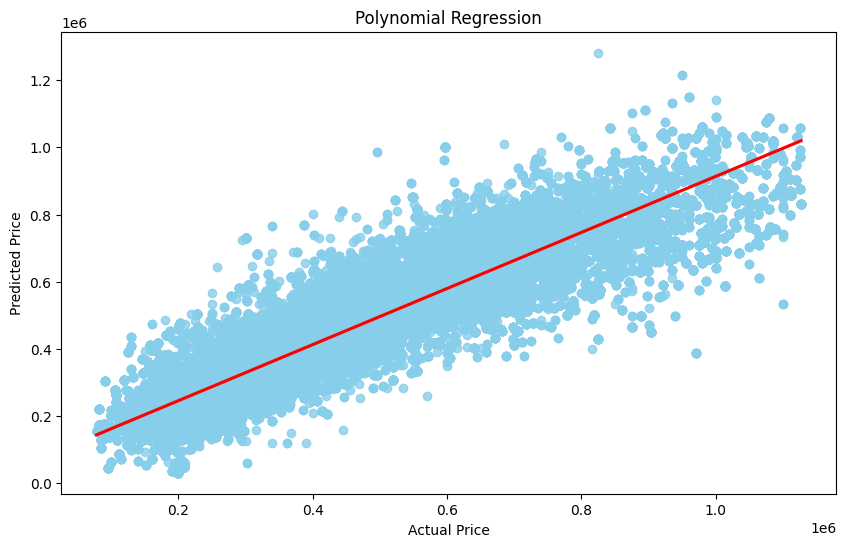

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test,y=y_pred,color='skyblue',line_kws={'color':'red'})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Polynomial Regression')
plt.show()

# Deployment

In [59]:
pickle.dump(LinearRegressionModel,open('LinearRegressionModel.sav','wb'))

In [60]:
loaded_model=pickle.load(open('LinearRegressionModel.sav','rb'))

In [63]:
input=x_pol.transform([[4.0,4,77890.0,3,1,3,10,1768,9913,1955.89,48.78,1840.90]])

In [64]:
result=loaded_model.predict(input)
print(result)

[8.21051195e+29]
